In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import missingno as mns
%matplotlib inline

In [2]:
df_imbd= pd.read_csv('IMDB_movie_reviews_details.csv')
df_imbd.head()

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M


In [3]:
#1.	Find the exact number of genre with the highest ratings  

In [4]:
df_imbd.isnull().sum()

Unnamed: 0      0
name            0
year            0
runtime         0
genre           0
rating          0
metascore     159
timeline        0
votes           0
gross         171
dtype: int64

In [5]:
df_imbd.dropna(axis=0)

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M
5,5,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,A jury holdout attempts to prevent a miscarria...,"706,079",$4.36M
...,...,...,...,...,...,...,...,...,...,...
991,991,Kelly's Heroes,1970,144,"Adventure, Comedy, War",7.6,50.0,A group of U.S. soldiers sneaks across enemy l...,"45,985",$1.38M
993,993,The Jungle Book,1967,78,"Animation, Adventure, Family",7.6,65.0,Bagheera the Panther and Baloo the Bear have a...,"168,985",$141.84M
994,994,A Hard Day's Night,1964,87,"Comedy, Musical",7.6,96.0,"Over two ""typical"" days in the life of The Bea...","40,931",$13.78M
997,997,Shane,1953,118,"Drama, Western",7.6,80.0,A weary gunfighter attempts to settle down wit...,"37,753",$20.00M


In [6]:
df_imbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   name        1000 non-null   object 
 2   year        1000 non-null   object 
 3   runtime     1000 non-null   int64  
 4   genre       1000 non-null   object 
 5   rating      1000 non-null   float64
 6   metascore   841 non-null    float64
 7   timeline    1000 non-null   object 
 8   votes       1000 non-null   object 
 9   gross       829 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [7]:
df_imbd

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M
...,...,...,...,...,...,...,...,...,...,...
995,995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,76.0,A young New York socialite becomes interested ...,"169,575",NaN
996,996,Giant,1956,201,"Drama, Western",7.6,84.0,Sprawling epic covering the life of a Texas ca...,"34,759",NaN
997,997,Shane,1953,118,"Drama, Western",7.6,80.0,A weary gunfighter attempts to settle down wit...,"37,753",$20.00M
998,998,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,85.0,"In Hawaii in 1941, a private is cruelly punish...","44,086",$30.50M


In [8]:
df_imbd.votes = df_imbd.votes.apply(lambda x:x,(',',''))

In [9]:
#1.	Find the exact number of genre with the highest ratings

In [10]:
df_imbd.votes

0      2,394,059
1      1,658,439
2         78,266
3      2,355,907
4      1,152,912
         ...    
995      169,575
996       34,759
997       37,753
998       44,086
999       26,903
Name: votes, Length: 1000, dtype: object

In [11]:
df_imbd.rating.max()

9.3

In [12]:
#Question2.Plot a graph showing from lowest to highest movies in ascending order with their ratings

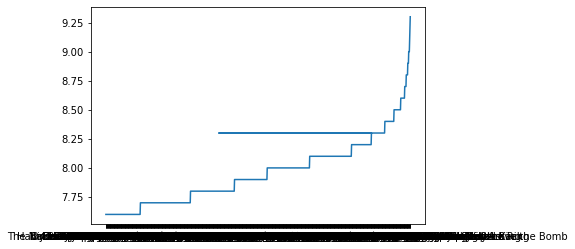

In [13]:
highest= df_imbd.sort_values(by= 'rating')
plt.plot(highest.name, highest.rating)

In [14]:
#Question3.Find the total number movies released from 2008 to 2019

In [15]:
total= len(df_imbd[(df_imbd['year'] >= '2008' ) & (df_imbd['year'] <= '2019' )])
total

267

In [16]:
#Question4.Create a chart showing the metascore per category

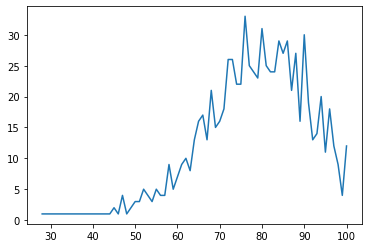

In [17]:
metascore= df_imbd.metascore.value_counts()
metascore.sort_index().plot()

In [18]:
#Question 5. Show the percentage of games that got a 9+ rating

In [19]:
{(5/747)*100} 

{0.6693440428380187}

In [20]:
#Question 6.Get the percentage of movies released for each of this year(2010 to 2020)

In [21]:
df2 = df_imbd[(df_imbd['year'] >= '2010' ) & (df_imbd['year'] <= '2020' )]
df2

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
9,9,Inception,2010,148,"Action, Adventure, Sci-Fi",8.8,74.0,A thief who steals corporate secrets through t...,"2,113,984",$292.58M
19,19,Parasite,2019,132,"Comedy, Drama, Thriller",8.6,96.0,Greed and class discrimination threaten the ne...,"608,406",$53.37M
20,20,Interstellar,2014,169,"Adventure, Drama, Sci-Fi",8.6,74.0,A team of explorers travel through a wormhole ...,"1,558,558",$188.02M
32,32,Hamilton,2020,160,"Biography, Drama, History",8.5,90.0,The real life of one of America's foremost fou...,"64,486",NaN
...,...,...,...,...,...,...,...,...,...,...
915,915,Despicable Me,2010,95,"Animation, Comedy, Crime",7.6,72.0,When a criminal mastermind uses a trio of orph...,"507,818",$251.51M
916,916,50/50,2011,100,"Comedy, Drama, Romance",7.6,72.0,"Inspired by a true story, a comedy centered on...","318,164",$35.01M
917,917,Kick-Ass,2010,117,"Action, Comedy, Crime",7.6,66.0,Dave Lizewski is an unnoticed high school stud...,"530,801",$48.07M
919,919,Moneyball,2011,133,"Biography, Drama, Sport",7.6,87.0,Oakland A's general manager Billy Beane's succ...,"379,573",$75.61M


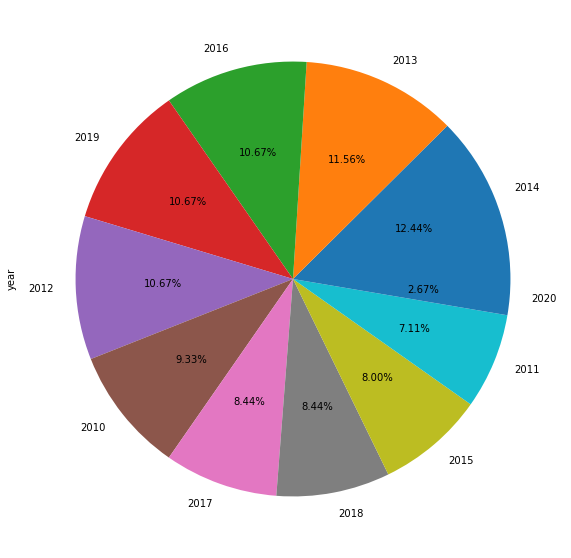

In [22]:
fig = plt.figure(figsize = (15,10))
rating = df2['year'].value_counts().plot.pie(autopct = '%1.2f%%')

In [23]:
#Question 7.Outline the 5 top genre that got the highest rating

In [24]:
rating= {}
for name, group in df_imbd.groupby('genre'):
    df_imbd2= df_imbd[df_imbd.genre==name]
    rating[name]=df_imbd2.rating.max()

In [25]:
df_imbd_rating= pd.DataFrame(rating.items(), columns= ['genre', 'highest rating'])
df_imbd_rating.sort_values(by='highest rating', ascending= False)

,genre,highest rating
137,Drama,9.3
122,"Crime, Drama",9.2
21,"Action, Crime, Drama",9.0
85,"Biography, Drama, History",8.9
4,"Action, Adventure, Drama",8.9
...,...,...
3,"Action, Adventure, Crime",7.6
44,"Adventure, Comedy, War",7.6
71,"Animation, Comedy, Crime",7.6
22,"Action, Crime, Mystery",7.6


In [26]:
#Question 8. Plot a graph to show the name of movies name with same runtime

In [27]:
runtime= df_imbd.runtime.unique()
runtime1= {}
for time in runtime:
    df_runtime= df_imbd[df_imbd.runtime== time]
    runtime1[time]= len(df_runtime)
sameruntime= pd.DataFrame(runtime1.items(), columns= ['runtime', 'number'])
sameruntime= sameruntime[sameruntime.number>1]
sameruntime

,runtime,number
0,142,6
2,153,8
3,152,6
4,202,2
5,96,16
...,...,...
118,197,2
119,85,5
123,157,5
124,82,2


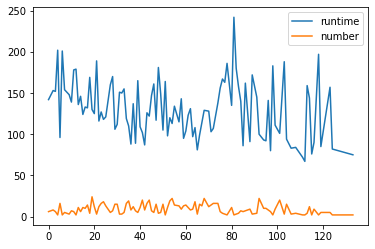

In [28]:
sameruntime.sort_index().plot()